In [1]:
#INF1340-Final project 
#Youwen Xu (1006675493)
#Link: https://jupyter.utoronto.ca/user/8beff8d4-57f4-4281-a033-2f6903bf7560/notebooks/1340/Youwen-Xu.ipynb#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline  
plt.style.use('fivethirtyeight')
import plotly 
#instal openpyxl
!pip install openpyxl 

In [2]:
# Table 1 International migrant stock at mid-year by sex and by major area, region, country or area, 1990-2015
# Read the table 1 from after 15 rows.
table1 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx",engine='openpyxl', sheet_name =1)
table1 = table1[15: ]
#print the all columns in table 1
table1.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22'],
      dtype='object')

In [3]:
#rename all the columns in table 1
new_names = {'Unnamed: 0':'Sort order',
             'Unnamed: 1':'Major area of destination',
             'Unnamed: 2':'Notes',
             'Unnamed: 3':'Country code',
             'Unnamed: 4':'Type of data(a)',
             'Unnamed: 5':'1990(both sexes',
             'Unnamed: 6':'1995(both sexes',
             'Unnamed: 7':'2000(both sexes',
             'Unnamed: 8':'2005(both sexes',
             'Unnamed: 9':'2010(both sexes',
             'Unnamed: 10':'2015(both sexes',
             'Unnamed: 11':'1990(male',
             'Unnamed: 12':'1995(male',
             'Unnamed: 13':'2000(male',
             'Unnamed: 14':'2005(male',
             'Unnamed: 15':'2010(male',
             'Unnamed: 16':'2015(male',
             'Unnamed: 17':'1990(female',
             'Unnamed: 18':'1995(female',
             'Unnamed: 19':'2000(female',
             'Unnamed: 20':'2005(female',
             'Unnamed: 21':'2010(female',
             'Unnamed: 22':'2015(female',        
             }
table1.rename(columns = new_names, inplace = True)
#Drop the the columns Sort order, Notes and Type of data(a) from the data frame
table1 = table1.drop(['Sort order', 'Notes', 'Type of data(a)'], axis=1)
#Change the format of data frame into identifier variables by using melt funtion
migrantStock_table1 = table1.melt(id_vars=["Major area of destination","Country code"],
                                  var_name="Year", value_name= "International_migrant_stock")
#Set the new variables gender as one new single column
def gender(x):
    x = x[5:]
    return x
#Set the new variables year as one new single column
def year(x):
    x = x[:4]
    return int(x)
#print the cleaned table1
migrantStock_table1["Gender"] = migrantStock_table1["Year"].apply(gender)
migrantStock_table1["Year"] = migrantStock_table1["Year"].apply(year)
migrantStock_table1

,Major area of destination,Country code,Year,International_migrant_stock,Gender
0,WORLD,900,1990,152563212,both sexes
1,Developed regions,901,1990,82378628,both sexes
2,Developing regions,902,1990,70184584,both sexes
3,Least developed countries,941,1990,11075966,both sexes
4,Less developed regions excluding least develop...,934,1990,59105261,both sexes
...,...,...,...,...,...
4765,Samoa,882,2015,2460.0,female
4766,Tokelau,772,2015,254.0,female
4767,Tonga,776,2015,2604.0,female
4768,Tuvalu,798,2015,63.0,female


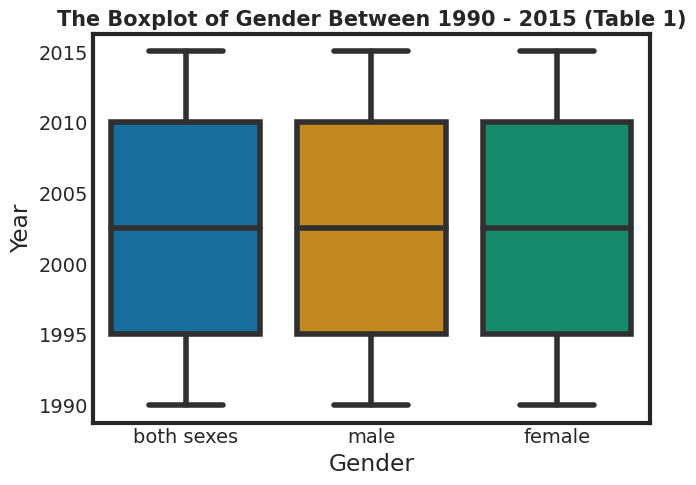

In [4]:
# Table 1 International migrant stock at mid-year by sex and by major area, region, country or area, 1990-2015
sns.set_style('white')
ax = plt.axes()
ax.set_facecolor("white")
sns.boxplot(y='Year', x='Gender',
                 data=migrantStock_table1,
                 width=0.8,
                 palette="colorblind")
plt.title("The Boxplot of Gender Between 1990 - 2015 (Table 1)", fontsize = 15,fontweight="bold")
plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("Year")
plt.show()

In [5]:
# Table 2 Total population migrant stock at mid-year by sex and by major area, region, country or area, 1990-2015
# Read the table 2 from after 15 rows.
table2 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx",engine='openpyxl', sheet_name =2)
table2 = table2[15: ]
#print the all columns in table 2
table2.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [6]:
#rename all the columns in table 2
new_names2 = {'Unnamed: 0':'Sort order',
             'Unnamed: 1':'Major area of destination',
             'Unnamed: 2':'Notes',
             'Unnamed: 3':'Country code',
             'Unnamed: 4':'1990(both sexes',
             'Unnamed: 5':'1995(both sexes',
             'Unnamed: 6':'2000(both sexes',
             'Unnamed: 7':'2005(both sexes',
             'Unnamed: 8':'2010(both sexes',
             'Unnamed: 9':'2015(both sexes',
             'Unnamed: 10':'1990(male',
             'Unnamed: 11':'1995(male',
             'Unnamed: 12':'2000(male',
             'Unnamed: 13':'2005(male',
             'Unnamed: 14':'2010(male',
             'Unnamed: 15':'2015(male',
             'Unnamed: 16':'1990(female',
             'Unnamed: 17':'1995(female',
             'Unnamed: 18':'2000(female',
             'Unnamed: 19':'2005(female',
             'Unnamed: 20':'2010(female',
             'Unnamed: 21':'2015(female',
             }
table2.rename(columns = new_names2, inplace = True)
#Drop the the columns Sort order, Notes from the data frame
table2 = table2.drop(['Sort order', 'Notes'], axis=1)
#Change the format of data frame into identifier variables by using melt function
TotalPopulation_table2 = table2.melt(id_vars=["Major area of destination", "Country code"]
                                     ,var_name="Year", value_name="Total_Population")
#set the gender and year as new variables into table2
TotalPopulation_table2["Gender"] = TotalPopulation_table2["Year"].apply(gender)
TotalPopulation_table2["Year"] =  TotalPopulation_table2["Year"].apply(year)
#print the cleaned table2
TotalPopulation_table2

,Major area of destination,Country code,Year,Total_Population,Gender
0,WORLD,900,1990,5309667.699,both sexes
1,Developed regions,901,1990,1144463.062,both sexes
2,Developing regions,902,1990,4165204.637,both sexes
3,Least developed countries,941,1990,510057.629,both sexes
4,Less developed regions excluding least develop...,934,1990,3655147.008,both sexes
...,...,...,...,...,...
4765,Samoa,882,2015,93.584,female
4766,Tokelau,772,2015,..,female
4767,Tonga,776,2015,52.931,female
4768,Tuvalu,798,2015,..,female


In [7]:
# remove all n/a values or 0 values
pp_2 = TotalPopulation_table2[ ~ TotalPopulation_table2["Total_Population"].str.contains("..", na = False)]
pp_2

,Major area of destination,Country code,Year,Total_Population,Gender
0,WORLD,900,1990,5309667.699,both sexes
1,Developed regions,901,1990,1144463.062,both sexes
2,Developing regions,902,1990,4165204.637,both sexes
3,Least developed countries,941,1990,510057.629,both sexes
4,Less developed regions excluding least develop...,934,1990,3655147.008,both sexes
...,...,...,...,...,...
4756,Micronesia (Federated States of),583,2015,50.95,female
4760,Polynesia,957,2015,336.115,female
4763,French Polynesia,258,2015,138.468,female
4765,Samoa,882,2015,93.584,female


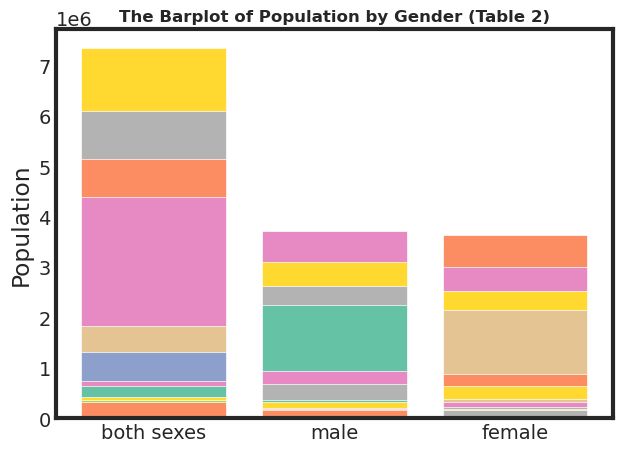

In [8]:
# Table 2 Total population migrant stock at mid-year by sex and by major area, region, country or area, 1990-2015
sns.set_style('white')
ax = plt.axes()
ax.set_facecolor('white')
plt.bar(pp_2.Gender, pp_2.Total_Population, width = 0.8, color=sns.color_palette("Set2"))
plt.ylabel('Population')
plt.title("The Barplot of Population by Gender (Table 2)", fontsize=12,fontweight="bold")
plt.show()

In [9]:
# Table 3 International migrant stock as a percentage of the total population, 1990-2015
# Read the table 3 from after 15 rows.
table3 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx",engine='openpyxl', sheet_name = 3)
table3 = table3[15: ]
# print all columns in table 3
table3.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22'],
      dtype='object')

In [10]:
#rename all the columns in table 3
new_names3 = {'Unnamed: 0':'Sort order',
             'Unnamed: 1':'Major area of destination',
             'Unnamed: 2':'Notes',
             'Unnamed: 3':'Country code',
             'Unnamed: 4':'Type of data(a)',
             'Unnamed: 5':'1990(both sexes',
             'Unnamed: 6':'1995(both sexes',
             'Unnamed: 7':'2000(both sexes',
             'Unnamed: 8':'2005(both sexes',
             'Unnamed: 9':'2010(both sexes',
             'Unnamed: 10':'2015(both sexes',
             'Unnamed: 11':'1990(male',
             'Unnamed: 12':'1995(male',
             'Unnamed: 13':'2000(male',
             'Unnamed: 14':'2005(male',
             'Unnamed: 15':'2010(male',
             'Unnamed: 16':'2015(male',
             'Unnamed: 17':'1990(female',
             'Unnamed: 18':'1995(female',
             'Unnamed: 19':'2000(female',
             'Unnamed: 20':'2005(female',
             'Unnamed: 21':'2010(female',
             'Unnamed: 22':'2015(female',        
             }

table3.rename(columns = new_names3, inplace = True)
#Drop the the columns Sort order, Notes and Type pf data(a) from the data frame
table3 = table3.drop(['Sort order', 'Notes','Type of data(a)'], axis=1)
#Change the format of data frame into identifier variables by using melt function
TotalPopulation_table3 = table3.melt(id_vars=["Major area of destination", "Country code"]
                                     ,var_name="Year", value_name="The_Percentage_of_International_Migrant_Stock")
# Set the gender and year as new variables into table3
TotalPopulation_table3["Gender"] = TotalPopulation_table3["Year"].apply(gender)
TotalPopulation_table3["Year"] =  TotalPopulation_table3["Year"].apply(year)
#print the cleaned table3
TotalPopulation_table3

,Major area of destination,Country code,Year,The_Percentage_of_International_Migrant_Stock,Gender
0,WORLD,900,1990,2.87331,both sexes
1,Developed regions,901,1990,7.198015,both sexes
2,Developing regions,902,1990,1.685021,both sexes
3,Least developed countries,941,1990,2.171513,both sexes
4,Less developed regions excluding least develop...,934,1990,1.617042,both sexes
...,...,...,...,...,...
4765,Samoa,882,2015,2.628654,female
4766,Tokelau,772,2015,..,female
4767,Tonga,776,2015,4.919612,female
4768,Tuvalu,798,2015,..,female


In [11]:
# remove all n/a values or 0 values
pp_3 = TotalPopulation_table3[ ~ TotalPopulation_table3["The_Percentage_of_International_Migrant_Stock"].str.contains("..", na = False)]
pp_3

,Major area of destination,Country code,Year,The_Percentage_of_International_Migrant_Stock,Gender
0,WORLD,900,1990,2.87331,both sexes
1,Developed regions,901,1990,7.198015,both sexes
2,Developing regions,902,1990,1.685021,both sexes
3,Least developed countries,941,1990,2.171513,both sexes
4,Less developed regions excluding least develop...,934,1990,1.617042,both sexes
...,...,...,...,...,...
4756,Micronesia (Federated States of),583,2015,2.518155,female
4760,Polynesia,957,2015,9.925472,female
4763,French Polynesia,258,2015,9.33212,female
4765,Samoa,882,2015,2.628654,female


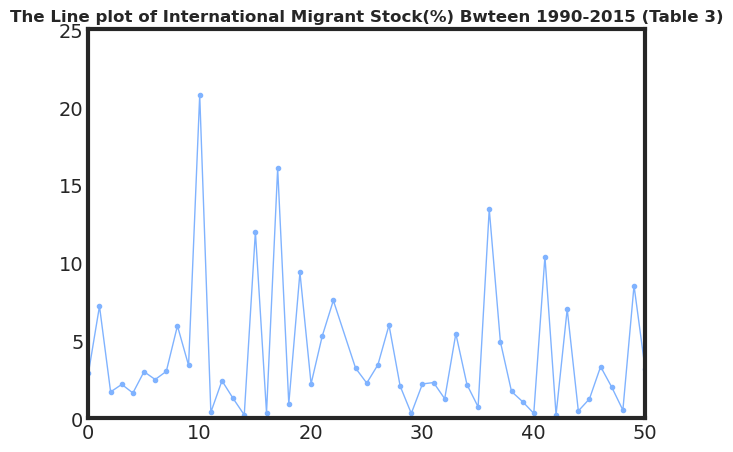

In [12]:
# Table 3 International migrant stock as a percentage of the total population, 1990-2015
plt.plot(pp_3.The_Percentage_of_International_Migrant_Stock, color="#80B3FF", 
         marker='o', linestyle='-', linewidth=1, markersize=3)
plt.xlim([0, 50])
plt.ylim([0, 25])
plt.title("The Line plot of International Migrant Stock(%) Bwteen 1990-2015 (Table 3)", fontsize=12,fontweight="bold")
plt.show()

In [13]:
# Table 4 Female migrants as a percantage of the international migrant stock by major area, region, country or area, 1990-2015
# Read the table 4 from after 15 rows.
table4 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx",engine='openpyxl', sheet_name = 4)
table4 = table4[15: ]
# print all columns in table 4
table4.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [14]:
#rename all the columns in table 4
new_names4 = {'Unnamed: 0':'Sort order',
             'Unnamed: 1':'Major area of destination',
             'Unnamed: 2':'Notes',
             'Unnamed: 3':'Country code',
             'Unnamed: 4':'Type of data(a)',
             'Unnamed: 5':'1990(female',
             'Unnamed: 6':'1995(female',
             'Unnamed: 7':'2000(female',
             'Unnamed: 8':'2005(female',
             'Unnamed: 9':'2010(female',
             'Unnamed: 10':'2015(female',       
             }
table4.rename(columns = new_names4, inplace = True)
#Drop the the columns Sort order, Notes and Type pf data(a) from the data frame
table4 = table4.drop(['Sort order', 'Notes','Type of data(a)'], axis=1)
#Change the format of data frame into identifier variables by using melt function
PercentageFemaleMigrant_table4 = table4.melt(id_vars=["Major area of destination", "Country code"]
                                     ,var_name="Year", 
                                     value_name="The_Percentage_of_Female_Migrant_Stock")
# Set the gender and year as new variables into table4
PercentageFemaleMigrant_table4["Gender"] = PercentageFemaleMigrant_table4["Year"].apply(gender)
PercentageFemaleMigrant_table4["Year"] = PercentageFemaleMigrant_table4["Year"].apply(year)
#print the cleaned table 4
PercentageFemaleMigrant_table4

,Major area of destination,Country code,Year,The_Percentage_of_Female_Migrant_Stock,Gender
0,WORLD,900,1990,49.03915,female
1,Developed regions,901,1990,51.123977,female
2,Developing regions,902,1990,46.592099,female
3,Least developed countries,941,1990,47.261155,female
4,Less developed regions excluding least develop...,934,1990,46.466684,female
...,...,...,...,...,...
1585,Samoa,882,2015,49.908704,female
1586,Tokelau,772,2015,52.156057,female
1587,Tonga,776,2015,45.437096,female
1588,Tuvalu,798,2015,44.680851,female


In [15]:
# remove all n/a values or 0 values
pp_4 = PercentageFemaleMigrant_table4[ ~ PercentageFemaleMigrant_table4["The_Percentage_of_Female_Migrant_Stock"].str.contains("..", na = False)]
pp_4

,Major area of destination,Country code,Year,The_Percentage_of_Female_Migrant_Stock,Gender
0,WORLD,900,1990,49.03915,female
1,Developed regions,901,1990,51.123977,female
2,Developing regions,902,1990,46.592099,female
3,Least developed countries,941,1990,47.261155,female
4,Less developed regions excluding least develop...,934,1990,46.466684,female
...,...,...,...,...,...
1585,Samoa,882,2015,49.908704,female
1586,Tokelau,772,2015,52.156057,female
1587,Tonga,776,2015,45.437096,female
1588,Tuvalu,798,2015,44.680851,female


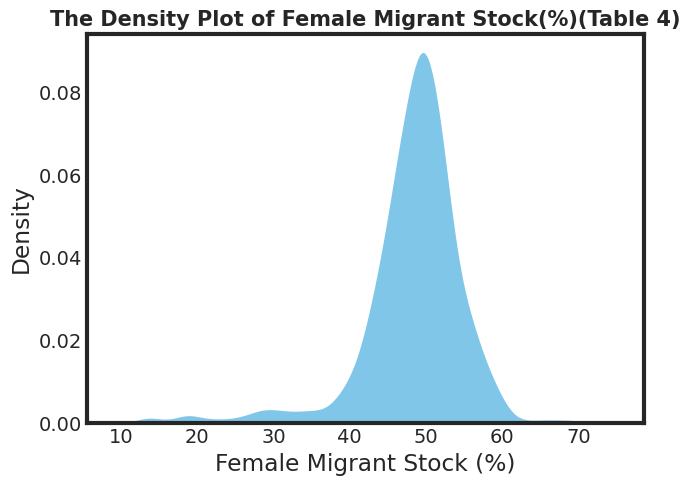

In [16]:
# Table 4 Female migrants as a percantage of the international migrant stock by major area, region, country or area, 1990-2015
# Make density plot
sns.kdeplot(pp_4['The_Percentage_of_Female_Migrant_Stock'],fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
plt.title("The Density Plot of Female Migrant Stock(%)(Table 4)", fontsize = 15,fontweight="bold")
plt.suptitle("")
plt.xlabel("Female Migrant Stock (%)")
plt.show()


In [17]:
# Table 5 Annual rate of change of the migrant stock by sex and by major area, region,country or area, 1990-2015
# Read the table 5 from after 15 rows.
table5 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx",engine='openpyxl', sheet_name = 5)
table5 = table5[15: ]
# print all columns in tablb 5
table5.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [18]:
#rename all the columns in table 5
new_names5 = {'Unnamed: 0':'Sort order',
             'Unnamed: 1':'Major area of destination',
             'Unnamed: 2':'Notes',
             'Unnamed: 3':'Country code',
             'Unnamed: 4':'Type of data(a)',
             'Unnamed: 5':'1990-1995_both',
             'Unnamed: 6':'1995-2000_both',
             'Unnamed: 7':'2000-2005_both',
             'Unnamed: 8':'2005-2010_both',
             'Unnamed: 9':'2010-2015_both',
             'Unnamed: 10':'1990-1995_male',
             'Unnamed: 11':'1995-2000_male',
             'Unnamed: 12':'2000-2005_male',
             'Unnamed: 13':'2005-2010_male',
             'Unnamed: 14':'2010-2015_male',
             'Unnamed: 15':'1990-1995_female',
             'Unnamed: 16':'1995-2000_female',
             'Unnamed: 17':'2000-2005_female',
             'Unnamed: 18':'2005-2010_female',
             'Unnamed: 19':'2010-2015_female',        
             }
table5.rename(columns = new_names5, inplace = True)
#Drop the the columns Sort order, Notes and Type pf data(a) from the data frame
table5 = table5.drop(['Sort order', 'Notes','Type of data(a)'], axis=1)
#Change the format of data frame into identifier variables by using melt function
AnnualRate_migrantstock_table5 = table5.melt(id_vars=["Major area of destination", "Country code"]
                                              ,var_name="Year",value_name="Annual_Rate_of_change_of_migrant_stock")
#set the new gender and year variables into table 5
def gender(x):
    x = x[10:]
    return x
def get_year(x):
    x = x[:9]
    return x
AnnualRate_migrantstock_table5["Gender"] = AnnualRate_migrantstock_table5["Year"].apply(gender)
AnnualRate_migrantstock_table5["Year"] = AnnualRate_migrantstock_table5["Year"].apply(get_year)
#print the cleaned table5
AnnualRate_migrantstock_table5

,Major area of destination,Country code,Year,Annual_Rate_of_change_of_migrant_stock,Gender
0,WORLD,900,1990-1995,1.051865,both
1,Developed regions,901,1990-1995,2.275847,both
2,Developing regions,902,1990-1995,-0.487389,both
3,Least developed countries,941,1990-1995,1.118175,both
4,Less developed regions excluding least develop...,934,1990-1995,-0.803244,both
...,...,...,...,...,...
3970,Samoa,882,2010-2015,-0.545343,female
3971,Tokelau,772,2010-2015,2.60325,female
3972,Tonga,776,2010-2015,2.526318,female
3973,Tuvalu,798,2010-2015,-1.819436,female


In [19]:
# remove all n/a values or 0 values
pp_5 = AnnualRate_migrantstock_table5[ ~ AnnualRate_migrantstock_table5["Annual_Rate_of_change_of_migrant_stock"].str.contains("..", na = False)]
pp_5

,Major area of destination,Country code,Year,Annual_Rate_of_change_of_migrant_stock,Gender
0,WORLD,900,1990-1995,1.051865,both
1,Developed regions,901,1990-1995,2.275847,both
2,Developing regions,902,1990-1995,-0.487389,both
3,Least developed countries,941,1990-1995,1.118175,both
4,Less developed regions excluding least develop...,934,1990-1995,-0.803244,both
...,...,...,...,...,...
3970,Samoa,882,2010-2015,-0.545343,female
3971,Tokelau,772,2010-2015,2.60325,female
3972,Tonga,776,2010-2015,2.526318,female
3973,Tuvalu,798,2010-2015,-1.819436,female


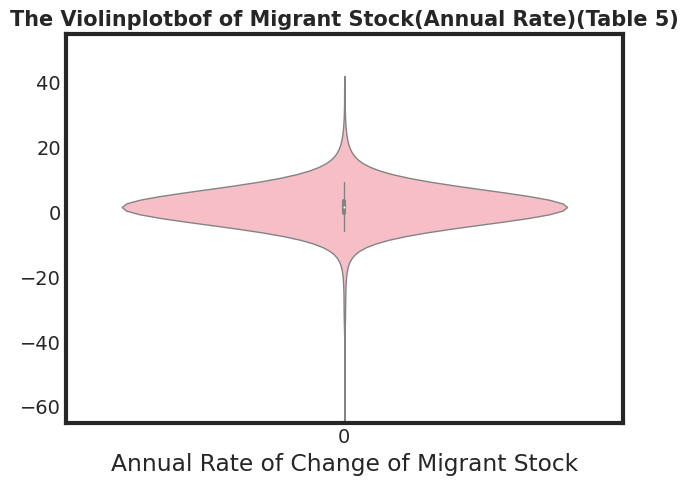

In [20]:
# Table 5 Annual rate of change of the migrant stock by sex and by major area, region,country or area, 1990-2015
# Set up the matplotlib figure
sns.set_style('white')
# Draw a violinplot with a narrower bandwidth
sns.violinplot(data=pp_5.Annual_Rate_of_change_of_migrant_stock, color="#FFB6C1", bw=.9, cut=1, linewidth=1)
plt.ylim([-65,55])
plt.title("The Violinplotbof of Migrant Stock(Annual Rate)(Table 5)", fontsize = 15,fontweight="bold")
plt.suptitle("")
plt.xlabel("Annual Rate of Change of Migrant Stock")
plt.show()

In [21]:
# Table 6 Estimated refugee stock at mid-year by major area, region, country or area, 1990-2015(percentage)
# Read the table 5 from after 15 rows.
table6 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx",engine='openpyxl', sheet_name = 6)
table6 = table6[15: ]
#print all columns in table 6
table6.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [22]:
#rename
new_names6 = {'Unnamed: 0':'Sort order',
             'Unnamed: 1':'Major area of destination',
             'Unnamed: 2':'Notes',
             'Unnamed: 3':'Country code',
             'Unnamed: 4':'Type of data(a)',
             'Unnamed: 5':'1990_stock',
             'Unnamed: 6':'1995_stock',
             'Unnamed: 7':'2000_stock',
             'Unnamed: 8':'2005_stock',
             'Unnamed: 9':'2010_stock',
             'Unnamed: 10':'2015_stock',
             'Unnamed: 11':'1990_percentage',
             'Unnamed: 12':'1995_percentage',
             'Unnamed: 13':'2000_percentage',
             'Unnamed: 14':'2005_percentage',
             'Unnamed: 15':'2010_percentage',
             'Unnamed: 16':'2015_percentage',
             'Unnamed: 17':'1990_annualrate',
             'Unnamed: 18':'1995_annualrate',
             'Unnamed: 19':'2000_annualrate',
             'Unnamed: 20':'2005_annualrate',
             'Unnamed: 21':'2010_annualrate',       
             }
table6.rename(columns = new_names6, inplace = True)
#separate the table 6 into 3 small long table
#Drop the the some columns from the data frame
table6 = table6.drop(['Sort order', 'Notes','Type of data(a)','1990_percentage','1995_percentage',
                      '2000_percentage','2005_percentage','2010_percentage','2015_percentage','1990_annualrate','1995_annualrate','2000_annualrate','2005_annualrate','2010_annualrate'], axis=1)
#Change the format of data frame into identifier variables by using melt function
RefugeeStock_table6 = table6.melt(id_vars=["Major area of destination", "Country code"]
                                              ,var_name="Year"
                                              ,value_name="Estimated_Refugee_Stock_both_sexes")

#Set the years as new variables
def get_year(x):
    x = x[:4]
    return x
RefugeeStock_table6["Year"] = RefugeeStock_table6["Year"].apply(get_year)
#print the first long table of tablb6 
RefugeeStock_table6



,Major area of destination,Country code,Year,Estimated_Refugee_Stock_both_sexes
0,WORLD,900,1990,18836571
1,Developed regions,901,1990,2014564
2,Developing regions,902,1990,16822007
3,Least developed countries,941,1990,5048391
4,Less developed regions excluding least develop...,934,1990,11773616
...,...,...,...,...
1585,Samoa,882,2015,0.0
1586,Tokelau,772,2015,0.0
1587,Tonga,776,2015,0.0
1588,Tuvalu,798,2015,0.0


In [23]:
# remove all n/a values or 0 values
pp_6_1 = RefugeeStock_table6[ ~ RefugeeStock_table6["Estimated_Refugee_Stock_both_sexes"].str.contains("..", na = False)]
pp_6_1


,Major area of destination,Country code,Year,Estimated_Refugee_Stock_both_sexes
0,WORLD,900,1990,18836571
1,Developed regions,901,1990,2014564
2,Developing regions,902,1990,16822007
3,Least developed countries,941,1990,5048391
4,Less developed regions excluding least develop...,934,1990,11773616
...,...,...,...,...
1585,Samoa,882,2015,0.0
1586,Tokelau,772,2015,0.0
1587,Tonga,776,2015,0.0
1588,Tuvalu,798,2015,0.0


In [25]:
# Table 6 Estimated refugee stock at mid-year by major area, region, country or area, 1990-2015(percentage)
# Read the table 5 from after 15 rows.
table6_2 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx",engine='openpyxl', sheet_name = 6)
table6_2 = table6_2[15: ]
#print all columns in table 6
table6_2.columns
#rename
new_names6_2 = {'Unnamed: 0':'Sort order',
             'Unnamed: 1':'Major area of destination',
             'Unnamed: 2':'Notes',
             'Unnamed: 3':'Country code',
             'Unnamed: 4':'Type of data(a)',
             'Unnamed: 5':'1990_stock',
             'Unnamed: 6':'1995_stock',
             'Unnamed: 7':'2000_stock',
             'Unnamed: 8':'2005_stock',
             'Unnamed: 9':'2010_stock',
             'Unnamed: 10':'2015_stock',
             'Unnamed: 11':'1990_percentage',
             'Unnamed: 12':'1995_percentage',
             'Unnamed: 13':'2000_percentage',
             'Unnamed: 14':'2005_percentage',
             'Unnamed: 15':'2010_percentage',
             'Unnamed: 16':'2015_percentage',
             'Unnamed: 17':'1990_annualrate',
             'Unnamed: 18':'1995_annualrate',
             'Unnamed: 19':'2000_annualrate',
             'Unnamed: 20':'2005_annualrate',
             'Unnamed: 21':'2010_annualrate',       
             }
table6_2.rename(columns = new_names6_2, inplace = True)
#separate the table 6 into 3 small long table
#Drop the the some columns from the data frame
table6_2 = table6_2.drop(['Sort order', 'Notes','Type of data(a)','1990_stock','1995_stock',
                        '2000_stock','2005_stock','2010_stock','2015_stock','1990_annualrate','1995_annualrate','2000_annualrate','2005_annualrate','2010_annualrate'], axis=1)
#Change the format of data frame into identifier variables by using melt function
RefugeePercentage_table6_2 = table6_2.melt(id_vars=["Major area of destination", "Country code"]
                                              ,var_name="Year"
                                              ,value_name="The_percentage_of_refugees_international_migrant_stock")

#Set the years as new variables
def get_year(x):
    x = x[:4]
    return x
RefugeePercentage_table6_2["Year"] = RefugeePercentage_table6_2["Year"].apply(get_year)
#print the second long table of tablb6 
RefugeePercentage_table6_2

,Major area of destination,Country code,Year,The_percentage_of_refugees_international_migrant_stock
0,WORLD,900,1990,12.346732
1,Developed regions,901,1990,2.445494
2,Developing regions,902,1990,23.968236
3,Least developed countries,941,1990,45.56588
4,Less developed regions excluding least develop...,934,1990,19.919743
...,...,...,...,...
1585,Samoa,882,2015,0.0
1586,Tokelau,772,2015,0.0
1587,Tonga,776,2015,0.0
1588,Tuvalu,798,2015,0.0


In [26]:
# remove all n/a values or 0 values
pp_6_2 = RefugeePercentage_table6_2[ ~ RefugeePercentage_table6_2["The_percentage_of_refugees_international_migrant_stock"].str.contains("..", na = False)]
pp_6_2

,Major area of destination,Country code,Year,The_percentage_of_refugees_international_migrant_stock
0,WORLD,900,1990,12.346732
1,Developed regions,901,1990,2.445494
2,Developing regions,902,1990,23.968236
3,Least developed countries,941,1990,45.56588
4,Less developed regions excluding least develop...,934,1990,19.919743
...,...,...,...,...
1585,Samoa,882,2015,0.0
1586,Tokelau,772,2015,0.0
1587,Tonga,776,2015,0.0
1588,Tuvalu,798,2015,0.0


In [27]:
table6_3 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx",engine='openpyxl', sheet_name = 6)
table6_3 = table6_3[15: ]
table6_3.columns
#rename
new_names6_3 = {'Unnamed: 0':'Sort order',
             'Unnamed: 1':'Major area of destination',
             'Unnamed: 2':'Notes',
             'Unnamed: 3':'Country code',
             'Unnamed: 4':'Type of data(a)',
             'Unnamed: 5':'1990_stock',
             'Unnamed: 6':'1995_stock',
             'Unnamed: 7':'2000_stock',
             'Unnamed: 8':'2005_stock',
             'Unnamed: 9':'2010_stock',
             'Unnamed: 10':'2015_stock',
             'Unnamed: 11':'1990_percentage',
             'Unnamed: 12':'1995_percentage',
             'Unnamed: 13':'2000_percentage',
             'Unnamed: 14':'2005_percentage',
             'Unnamed: 15':'2010_percentage',
             'Unnamed: 16':'2015_percentage',
             'Unnamed: 17':'1990-1995_annualrate',
             'Unnamed: 18':'1995-2000_annualrate',
             'Unnamed: 19':'2000-2005_annualrate',
             'Unnamed: 20':'2005-2010_annualrate',
             'Unnamed: 21':'2010-2015_annualrate',       
             }
table6_3.rename(columns = new_names6_3, inplace = True)
#separate the table 6 into 3 small long table
#Drop the the some columns from the data frame
table6_3 = table6_3.drop(['Sort order', 'Notes','Type of data(a)','1990_stock','1995_stock',
                        '2000_stock','2005_stock','2010_stock','2015_stock','1990_percentage','1995_percentage','2000_percentage','2005_percentage','2010_percentage','2015_percentage'], axis=1)
#Change the format of data frame into identifier variables by using melt function
RefugeeAnnual_table6_3 = table6_3.melt(id_vars=["Major area of destination", "Country code"]
                                              ,var_name="Year"
                                              ,value_name="Annual_rate_of_change_of_the_refugees_stock")

#Set the years as new variables
def get_year(x):
    x = x[:9]
    return x
RefugeeAnnual_table6_3["Year"] = RefugeeAnnual_table6_3["Year"].apply(get_year)
#print the third long table of tablb6 
RefugeeAnnual_table6_3

,Major area of destination,Country code,Year,Annual_rate_of_change_of_the_refugees_stock
0,WORLD,900,1990-1995,-2.123497
1,Developed regions,901,1990-1995,9.388424
2,Developing regions,902,1990-1995,-2.839417
3,Least developed countries,941,1990-1995,-0.680327
4,Less developed regions excluding least develop...,934,1990-1995,-4.3836
...,...,...,...,...
1320,Samoa,882,2010-2015,..
1321,Tokelau,772,2010-2015,..
1322,Tonga,776,2010-2015,..
1323,Tuvalu,798,2010-2015,..


In [28]:
# remove all n/a values or 0 values
pp_6_3 = RefugeeAnnual_table6_3[ ~ RefugeeAnnual_table6_3["Annual_rate_of_change_of_the_refugees_stock"].str.contains("..", na = False)]
pp_6_3

,Major area of destination,Country code,Year,Annual_rate_of_change_of_the_refugees_stock
0,WORLD,900,1990-1995,-2.123497
1,Developed regions,901,1990-1995,9.388424
2,Developing regions,902,1990-1995,-2.839417
3,Least developed countries,941,1990-1995,-0.680327
4,Less developed regions excluding least develop...,934,1990-1995,-4.3836
...,...,...,...,...
1300,New Zealand,554,2010-2015,-11.80581
1301,Melanesia,928,2010-2015,-0.268521
1302,Fiji,242,2010-2015,50.708582
1304,Papua New Guinea,598,2010-2015,0.137417


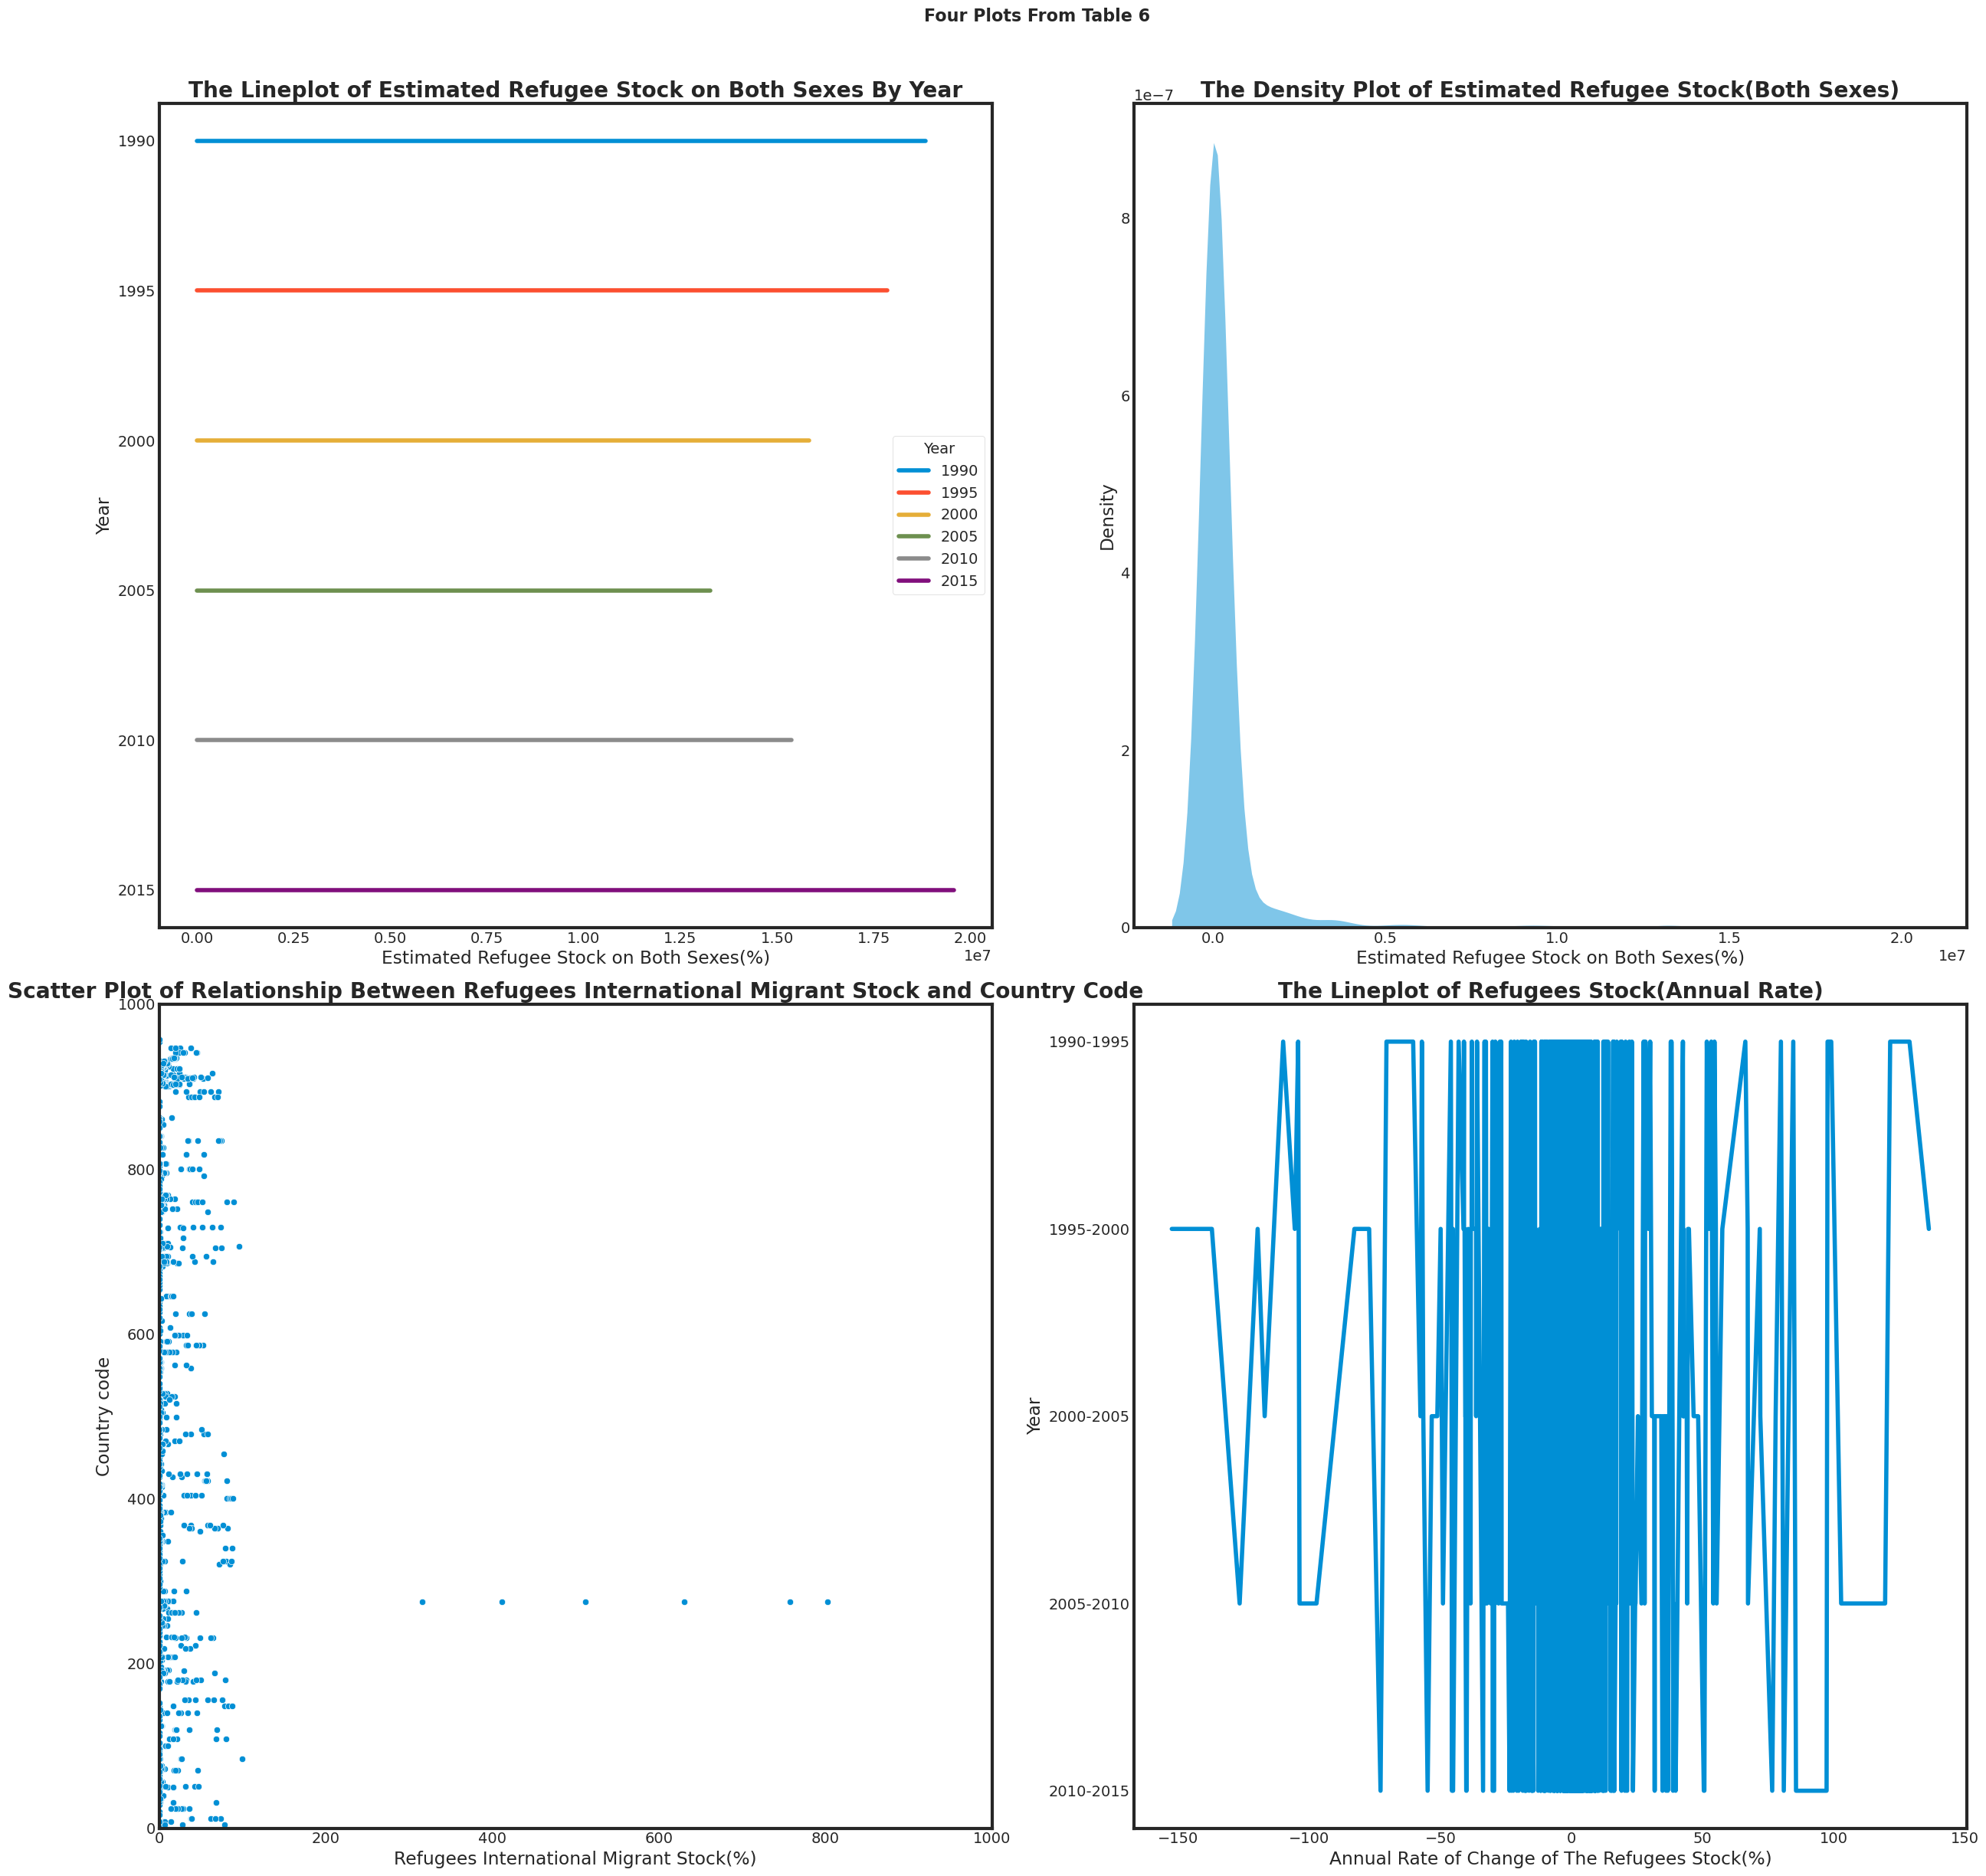

In [29]:
sns.set_style('white')
# set figure size
f, ax = plt.subplots(2, 2, figsize=(25,25))
# set sub title
f.suptitle('Four Plots From Table 6',fontweight='bold',fontsize=16)

# Table 6_1 Estimated refugee stock at mid-year by major area, region, country or area, 1990-2015(percentage)
ax[0,0].set_title('The Lineplot of Estimated Refugee Stock on Both Sexes By Year',fontweight="bold")
ax[0,0].set_ylabel('Year')
ax[0,0].set_xlabel('Estimated Refugee Stock on Both Sexes(%)')
sns.lineplot(y="Year", x="Estimated_Refugee_Stock_both_sexes", hue = "Year", estimator = "mean", ci=None, data=pp_6_1, ax=ax[0,0])

# Table 6_1 Estimated refugee stock at mid-year by major area, region, country or area, 1990-2015(percentage)
ax[0,1].set_title('The Density Plot of Estimated Refugee Stock(Both Sexes)',fontweight="bold")
sns.kdeplot(pp_6_1['Estimated_Refugee_Stock_both_sexes'],fill=True, common_norm=False,
            palette="crest", alpha=.5, linewidth=0,ax=ax[0,1])
ax[0,1].set_xlabel('Estimated Refugee Stock on Both Sexes(%)')



# Table 6_2 Estimated refugee stock at mid-year by major area, region, country or area, 1990-2015(percentage)
ax[1,0].set_title('Scatter Plot of Relationship Between Refugees International Migrant Stock and Country Code',fontweight="bold")
ax[1,0].set_ylabel('Country code')
ax[1,0].set_xlabel('Refugees International Migrant Stock(%)')
sns.scatterplot(y="Country code", x="The_percentage_of_refugees_international_migrant_stock", data=pp_6_2, ax=ax[1,0])
ax[1,0].set_xlim([0,1000])
ax[1,0].set_ylim([0,1000])

# Table 6_3 Estimated refugee stock at mid-year by major area, region, country or area, 1990-2015(percentage)
ax[1,1].set_title('The Lineplot of Refugees Stock(Annual Rate)',fontweight="bold")
ax[1,1].set_ylabel('Year')
ax[1,1].set_xlabel('Annual Rate of Change of The Refugees Stock(%)')
sns.lineplot(y= "Year", x ="Annual_rate_of_change_of_the_refugees_stock",estimator = "mean", ci=None, data=pp_6_3, ax=ax[1,1])


f.tight_layout()
f.subplots_adjust(top=.93)

plt.show()